In [2]:
import multiprocessing
import os
import warnings
from concurrent.futures import ThreadPoolExecutor
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML

from lib.comstock_processor import ComStockProcessor

dataset_path = Path().resolve().cwd() / "datasets"
print(f"Dataset path: {dataset_path}")

data_path = dataset_path / "comstock"
print(f"Data path: {data_path}")

time_series_data_path = data_path / "time_series_data"
print(f"Time Series Data path: {time_series_data_path}")

figures_path = Path().resolve() / "figures"
for path in [figures_path, time_series_data_path]:
    if not path.exists():
        path.mkdir(parents=True)
print(f"Figures path: {figures_path}")

# ignore SettingWithCopyWarning
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

# Allow autoreload as we develop dependent packages in parallel
%load_ext autoreload
%autoreload 2

Dataset path: /Users/nlong/working/comstock/comstock_processor/datasets
Data path: /Users/nlong/working/comstock/comstock_processor/datasets/comstock
Time Series Data path: /Users/nlong/working/comstock/comstock_processor/datasets/comstock/time_series_data
Figures path: /Users/nlong/working/comstock/comstock_processor/figures


# ComStock

### Pull down ComStock metadata

The data will be saved into the ComStock datasets subfolder. It takes a while to run (10ish minutes) but will only download the file if it does not already exist.

### Read in ComStock data

In [3]:
# Download and convert the data file to a dataframe.
processor = ComStockProcessor(state="CA", county_name="All", building_type="All", upgrade="0", base_dir=data_path)
df_all = processor.process_metadata(save_dir=data_path)
display(df_all)

Metadata parquet already exists. Skipping download.
Metadata csv already exists. Skipping creation. Delete /Users/nlong/working/comstock/comstock_processor/datasets/comstock/CA-All-All-0-selected_metadata.csv if you want to save again.


/Users/nlong/working/comstock/comstock_processor/lib/comstock_processor.py:74: DtypeWarning: Columns (57,578,585,850) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv(output_csv)


,bldg_id,metadata_index,upgrade,weight,in.sqft,calc.weighted.sqft,in.upgrade_name,applicability,in.building_america_climate_zone,in.cambium_grid_region,...,calc.weighted.savings.natural_gas.interior_equipment.energy_consumption..tbtu,calc.weighted.savings.natural_gas.total.energy_consumption..tbtu,calc.weighted.savings.natural_gas.water_systems.energy_consumption..tbtu,calc.weighted.savings.other_fuel.cooling.energy_consumption..tbtu,calc.weighted.savings.other_fuel.heating.energy_consumption..tbtu,calc.weighted.savings.other_fuel.interior_equipment.energy_consumption..tbtu,calc.weighted.savings.other_fuel.total.energy_consumption..tbtu,calc.weighted.savings.other_fuel.water_systems.energy_consumption..tbtu,calc.weighted.savings.site_energy.total.energy_consumption..tbtu,calc.weighted.site_energy.total.energy_consumption..tbtu
0,15166,124,0,4.088175,75000.0,306613.134604,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013809
1,15214,125,0,4.088175,17500.0,71543.064741,Baseline,True,Marine,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003742
2,15264,126,0,4.088175,17500.0,71543.064741,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143
3,15516,127,0,4.088175,37500.0,153306.567302,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009218
4,15626,128,0,4.088175,17500.0,71543.064741,Baseline,True,Marine,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39341,56112,56951,0,1.870652,1000.0,1870.652159,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000210
39342,56113,56952,0,3.204584,3000.0,9613.753156,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000765
39343,56114,56953,0,8.726058,3000.0,26178.174661,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001661
39344,56115,56954,0,3.204584,37500.0,120171.914445,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011795


,bldg_id,metadata_index,upgrade,weight,in.sqft,calc.weighted.sqft,in.upgrade_name,applicability,in.building_america_climate_zone,in.cambium_grid_region,...,calc.weighted.savings.natural_gas.interior_equipment.energy_consumption..tbtu,calc.weighted.savings.natural_gas.total.energy_consumption..tbtu,calc.weighted.savings.natural_gas.water_systems.energy_consumption..tbtu,calc.weighted.savings.other_fuel.cooling.energy_consumption..tbtu,calc.weighted.savings.other_fuel.heating.energy_consumption..tbtu,calc.weighted.savings.other_fuel.interior_equipment.energy_consumption..tbtu,calc.weighted.savings.other_fuel.total.energy_consumption..tbtu,calc.weighted.savings.other_fuel.water_systems.energy_consumption..tbtu,calc.weighted.savings.site_energy.total.energy_consumption..tbtu,calc.weighted.site_energy.total.energy_consumption..tbtu
0,29336,31532,0,7.566858,3000.0,22700.572551,Baseline,True,Marine,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016267
1,32845,34856,0,7.566858,7500.0,56751.431377,Baseline,True,Marine,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025671
2,50921,52005,0,7.566858,3000.0,22700.572551,Baseline,True,Marine,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008643
3,49070,50256,0,7.566858,1000.0,7566.857517,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007300
4,26276,28604,0,7.566858,7500.0,56751.431377,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,15400,18240,0,3.237925,150000.0,485688.731085,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005872
1303,41873,43432,0,3.237925,37500.0,121422.182771,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001859
1304,54562,55473,0,3.237925,17500.0,56663.685293,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001310
1305,48374,49601,0,3.237925,17500.0,56663.685293,Baseline,True,Hot-Dry,CAMXc,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000856


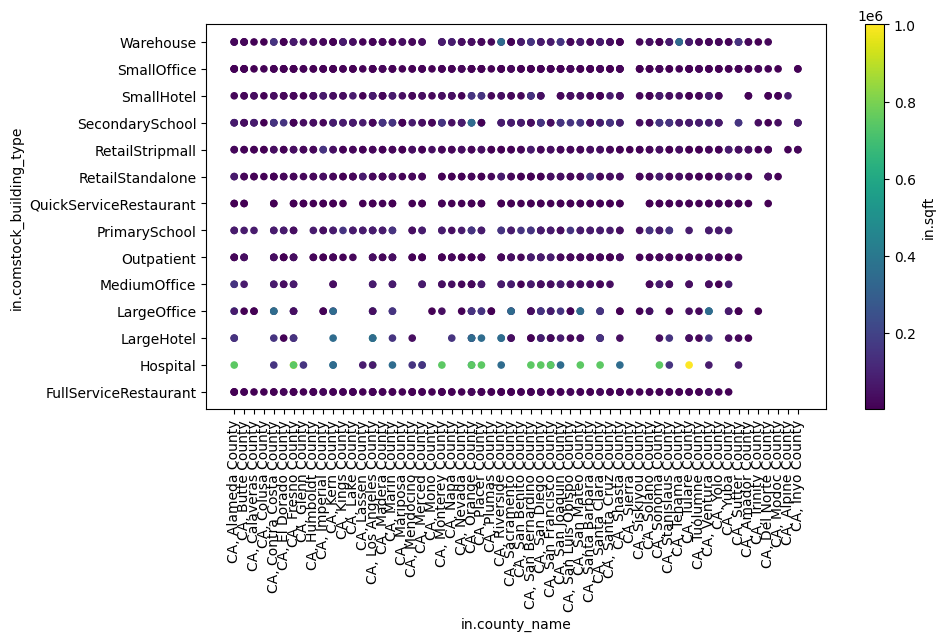

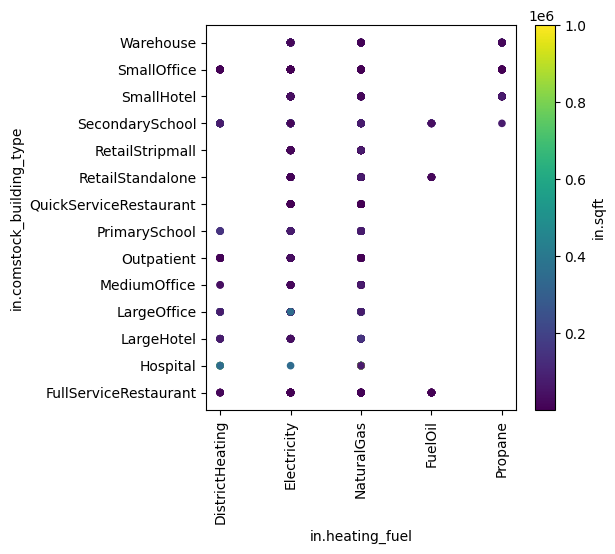

In [4]:
# sample the df_all data. First, group all the buildings by building_type, county_name, and heating_fuel.
# Set seed to 42, to make it reproducible for us all
df_all_sample = df_all.groupby(["in.comstock_building_type", "in.county_name", "in.heating_fuel"]).apply(
    lambda x: x.sample(1, random_state=42)
)

# reflatten the data
df_all_sample = df_all_sample.reset_index(drop=True)
display(df_all_sample)

# plot the parameter spaces: in.building_type, county_name, heating fuel
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_all_sample.plot.scatter(x="in.county_name", y="in.comstock_building_type", c="in.sqft", cmap="viridis", ax=ax)
plt.xticks(rotation=90)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_all_sample.plot.scatter(x="in.heating_fuel", y="in.comstock_building_type", c="in.sqft", cmap="viridis", ax=ax)
plt.xticks(rotation=90)

# get list of IDs from the sample,
download_timeseries_id = []

## Simplify data fields available and write simplified version to csv for analysis

In [5]:
df_sub = df_all[
    [
        "bldg_id",
        "in.sqft",
        "in.state",
        "in.county_name",
        "in.comstock_building_type",
        "in.building_subtype",
        "in.heating_fuel",
        "out.site_energy.total.energy_consumption_intensity",
        "out.district_cooling.total.energy_consumption",
        "out.district_heating.total.energy_consumption",
        "out.electricity.total.energy_consumption",
        "out.natural_gas.total.energy_consumption",
        "out.other_fuel.total.energy_consumption",
        "out.utility_bills.electricity_bill_max..usd",
        "out.utility_bills.electricity_bill_mean..usd",
        "out.utility_bills.electricity_bill_median..usd",
        "out.utility_bills.electricity_bill_min..usd",
        "out.utility_bills.electricity_bill_number_of_rates..usd",
    ]
]

# save to csv
df_sub.to_csv(data_path / "CA-All-All-0-metadata_simplified.csv", index=False)

# Download time series data

In [6]:
# Only download 101 buildings for sampling purposes and testing this notebook/repo
timeseries_to_download = df_sub.head(10)
print(f"Downloading time series data for {len(timeseries_to_download)} buildings into {time_series_data_path}")

time_series_data_file_paths, building_ids = processor.process_building_time_series(
    data_frame=timeseries_to_download, save_dir=time_series_data_path
)

Number of workers: 9


100%|██████████| 10/10 [00:00<00:00, 46551.65it/s]


In [8]:
# post process all the files and build up the combined data file, this can take about 1 minute to run (with 10 cores)

# if the data file exists, then just read that, otherwise, recreate the postprocessed file.
num_workers = max(1, multiprocessing.cpu_count() - 1)

all_sampled_timeseries_filename = time_series_data_path / "all_sampled_buildings-upgrade-0.parquet"

if all_sampled_timeseries_filename.exists():
    print("Loading in the sampled timeseries data from disk, delete the file if you need to recreate it")
    all_ts_df = pd.read_parquet(all_sampled_timeseries_filename)
else:

    def read_and_process_file(args) -> pd.DataFrame:
        """Method to read and process input file so that this can be used in parallel"""
        data_file, building_id = args
        # only read a copy of the columns in the file that we need, extend as needed.
        tdf = pd.read_parquet(
            data_file,
            columns=[
                "timestamp",
                "out.electricity.total.energy_consumption",
                "out.natural_gas.total.energy_consumption",
            ],
        )
        tdf["bldg_id"] = building_id
        return tdf

    # parallel process everything
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        all_dfs = list(executor.map(read_and_process_file, zip(time_series_data_file_paths, building_ids)))

    # concatenate the dataframes that were read in parallel.
    all_ts_df = pd.concat(all_dfs, ignore_index=True)
    # move the "bldg_id" column to the beginning
    all_ts_df = all_ts_df[["bldg_id"] + [col for col in all_ts_df.columns if col != "bldg_id"]]
    all_ts_df.to_parquet(all_sampled_timeseries_filename)

display(all_ts_df)

Loading in the sampled timeseries data from disk, delete the file if you need to recreate it


,bldg_id,timestamp,out.electricity.total.energy_consumption,out.natural_gas.total.energy_consumption
0,15166,2018-01-01 00:15:00,17.394823,1.124164
1,15166,2018-01-01 00:30:00,17.079663,0.118069
2,15166,2018-01-01 00:45:00,17.281866,0.873963
3,15166,2018-01-01 01:00:00,17.484068,0.852784
4,15166,2018-01-01 01:15:00,17.686270,0.854006
...,...,...,...,...
350395,16622,2018-12-31 23:00:00,242.551112,225.240136
350396,16622,2018-12-31 23:15:00,239.815712,221.369023
350397,16622,2018-12-31 23:30:00,236.956942,217.427064
350398,16622,2018-12-31 23:45:00,234.144907,212.742919


# Data Exploration Section

In [9]:
# get the dimensions
print(df_sub.shape)
# show all states
print(df_sub["in.state"].unique())
# show all the building types
print(df_sub["in.comstock_building_type"].unique())

(39346, 18)
['CA']
['Outpatient' 'Hospital' 'LargeOffice' 'LargeHotel' 'SmallOffice'
 'RetailStripmall' 'RetailStandalone' 'Warehouse' 'MediumOffice'
 'SmallHotel' 'FullServiceRestaurant' 'QuickServiceRestaurant'
 'SecondarySchool' 'PrimarySchool']


In [10]:
# save the names of the fields to a list
fields = df_all.columns
with open(data_path / "comstock_metadata_fields.txt", "w") as f:
    f.write("\n".join(fields))
    # write blank line at end
    f.write("\n")

In [13]:
# only buildings in CA
df_ca = df_sub[df_sub["in.state"].str.contains("CA")]
print(f"all: {df_sub.shape}")
print(f"cz7: {df_ca.shape}")
for to_display in ["in.building_subtype", "in.comstock_building_type"]:
    df_to_show = df_ca[to_display].value_counts()
    df_to_show = df_to_show.reset_index()
    display(HTML(df_to_show.to_html(index=False, border=1)))

all: (39346, 18)
cz7: (39346, 18)


in.building_subtype,count
strip_mall_restaurant20,3427
strip_mall_restaurant10,2097
strip_mall_restaurant30,2054
mediumoffice_nodatacenter,815
strip_mall_restaurant40,440
strip_mall_restaurant0,428
largeoffice_nodatacenter,227
largeoffice_datacenter,148


in.comstock_building_type,count
Warehouse,12014
RetailStripmall,8446
SmallOffice,6183
RetailStandalone,5172
Outpatient,1785
FullServiceRestaurant,1608
QuickServiceRestaurant,1087
MediumOffice,815
SmallHotel,639
PrimarySchool,623


In [14]:
county_counts = df_ca["in.county_name"].value_counts()
# make it a dataframe
county_counts = county_counts.reset_index()
# in the in.county_name remove CA, and County
county_counts["in.county_name"] = county_counts["in.county_name"].str.replace("CA,", "").str.replace("County", "")
# and trim the remainder
county_counts["in.county_name"] = county_counts["in.county_name"].str.strip()

# display the counts nicely, but with no index
display(HTML(county_counts.to_html(index=False, border=1)))

in.county_name,count
Los Angeles,10251
Orange,3090
San Diego,2952
San Bernardino,2268
Alameda,1932
Riverside,1817
Santa Clara,1811
Sacramento,1545
San Francisco,1389
Fresno,1152


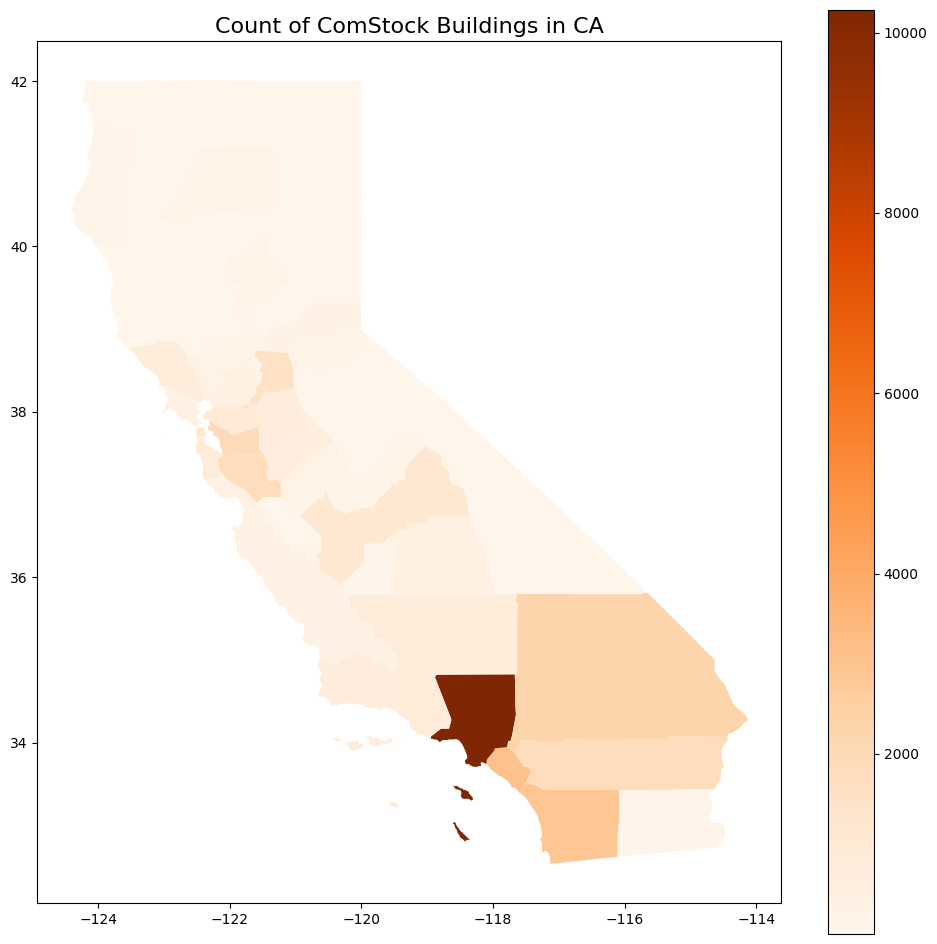

Text(0.5, 1.0, 'Count of ComStock Buildings in CA (without LA)')

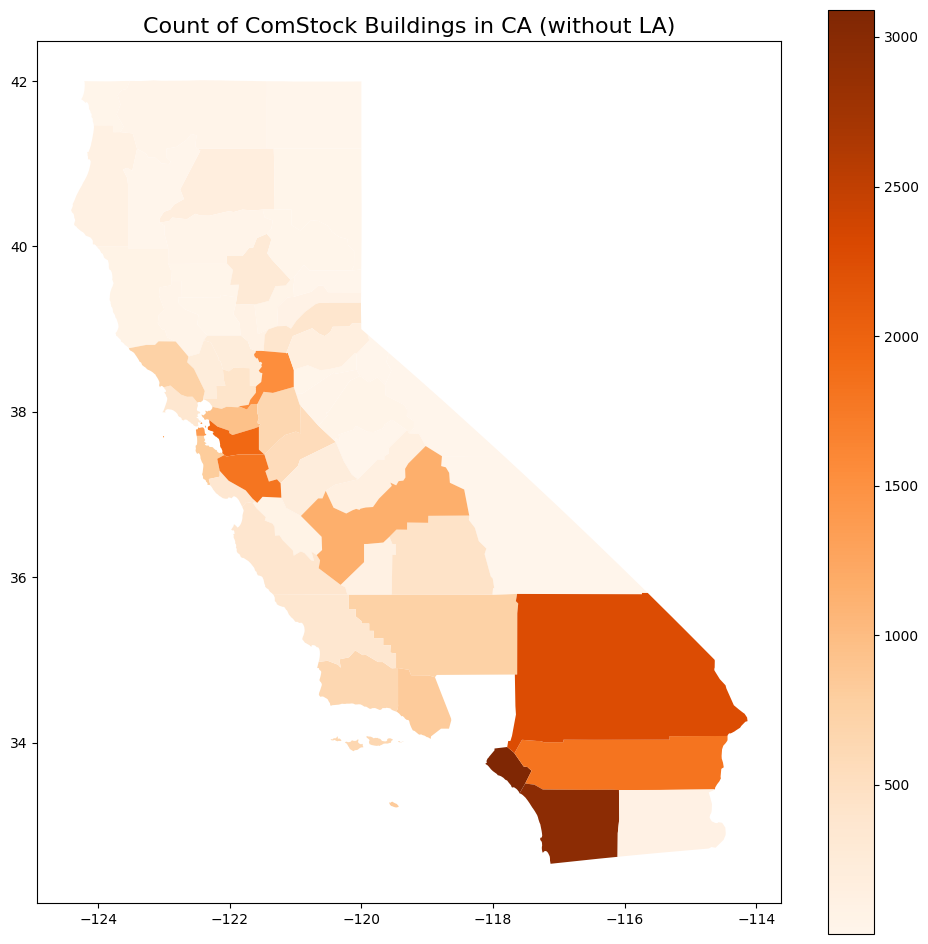

In [15]:
# Load a built-in dataset of US counties (you need geopandas installed)
counties_gdf = gpd.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")

# Filter for California counties (FIPS state code for CA is '06')
california_counties = counties_gdf[counties_gdf["STATE"] == "06"]

# convert county_counts to a dictionary of format {county_name: ["a", "b", "c"], count: [1, 2, 3]}
county_mapping = dict(zip(county_counts["in.county_name"], county_counts["count"]))
california_counties["count"] = california_counties["NAME"].map(county_mapping)

# Plot the map on a logscale
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
california_counties.plot(
    column="count",
    cmap="Oranges",
    legend=True,
    missing_kwds={"color": "lightgrey"},
    ax=ax,
)
plt.title("Count of ComStock Buildings in CA", fontsize=16)
plt.show()

# create another plot but without Los Angeles
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
california_counties[california_counties["NAME"] != "Los Angeles"].plot(
    column="count",
    cmap="Oranges",
    legend=True,
    missing_kwds={"color": "lightgrey"},
    ax=ax,
)
plt.title("Count of ComStock Buildings in CA (without LA)", fontsize=16)

out.district_cooling.total.energy_consumption    3.086478e+08
out.district_heating.total.energy_consumption    1.943792e+08
out.electricity.total.energy_consumption         1.845779e+10
out.natural_gas.total.energy_consumption         6.855990e+09
out.other_fuel.total.energy_consumption          5.116266e+07
dtype: float64


in.heating_fuel,count
NaturalGas,24724
Electricity,13870
Propane,366
DistrictHeating,340
FuelOil,46


Text(0.5, 1.0, 'ComStock - Heating Fuel Type by Count')

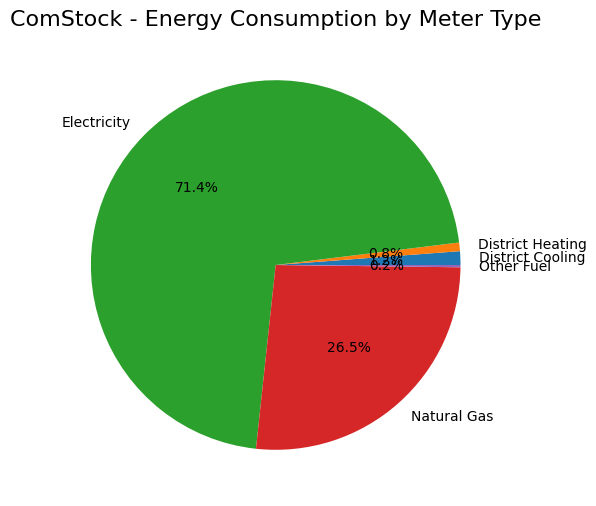

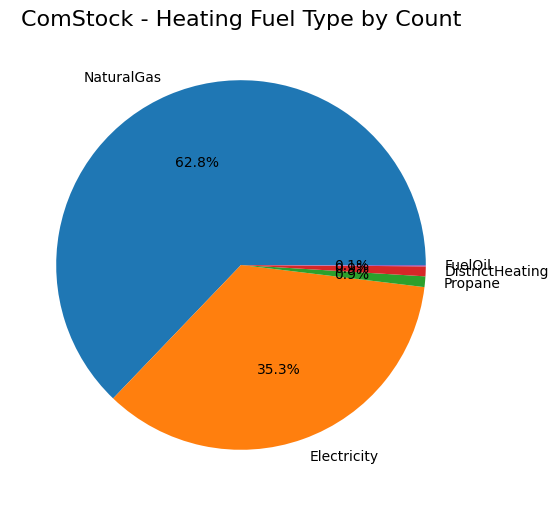

In [16]:
# create a pie chart of the total energy in kwh of district cooling, district heating, electricity, natural gas
meters = [
    "out.district_cooling.total.energy_consumption",
    "out.district_heating.total.energy_consumption",
    "out.electricity.total.energy_consumption",
    "out.natural_gas.total.energy_consumption",
    "out.other_fuel.total.energy_consumption",
]

# create a new dataframe with the sum of each meter
df_meters = df_ca[meters].sum()
print(df_meters)
# rename the columns to be shorter, electricity, natural gas, district heating,
# district cooling, and other fuel
df_meters = df_meters.rename(
    {
        "out.district_cooling.total.energy_consumption": "District Cooling",
        "out.district_heating.total.energy_consumption": "District Heating",
        "out.electricity.total.energy_consumption": "Electricity",
        "out.natural_gas.total.energy_consumption": "Natural Gas",
        "out.other_fuel.total.energy_consumption": "Other Fuel",
    }
)

# plot the meter totals as a pie chart
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.pie(df_meters, labels=df_meters.index, autopct="%1.1f%%")
plt.title("ComStock - Energy Consumption by Meter Type", fontsize=16)

# now show the heating fuel type by count
df_heating = df_ca["in.heating_fuel"].value_counts()
df_heating = df_heating.reset_index()
display(HTML(df_heating.to_html(index=False, border=1)))
# make a pie chart of count of heating fuels
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.pie(df_heating["count"], labels=df_heating["in.heating_fuel"], autopct="%1.1f%%")
plt.title("ComStock - Heating Fuel Type by Count", fontsize=16)